# Tutorial: Sequential model using Fashion MNIST dataset

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Build model (convolutional neural network)

In [2]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((3, 3)),
    Flatten(),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


## Compile model

In [3]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer=opt,
              loss=loss,
              metrics=[acc, mae])

## Load dataset

In [4]:
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

train_images.shape

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

## Show an image from the dataset

label: Ankle boot


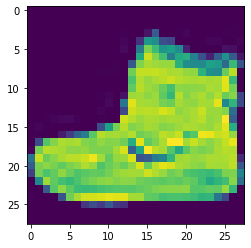

In [5]:
train_images = train_images / 255
test_images = test_images / 255

i = 0
img = train_images[i, :, :]
plt.imshow(img)
print(f"label: {labels[train_labels[i]]}")

## Fit model

In [6]:
history = model.fit(train_images[..., np.newaxis], train_labels, epochs=8, batch_size=256)

Epoch 1/8
235/235 [==============================] - 4s 15ms/step - loss: 0.5614 - sparse_categorical_accuracy: 0.8049 - mean_absolute_error: 4.4200
Epoch 2/8
235/235 [==============================] - 4s 15ms/step - loss: 0.3640 - sparse_categorical_accuracy: 0.8720 - mean_absolute_error: 4.4200
Epoch 3/8
235/235 [==============================] - 4s 15ms/step - loss: 0.3295 - sparse_categorical_accuracy: 0.8824 - mean_absolute_error: 4.4200
Epoch 4/8
235/235 [==============================] - 4s 15ms/step - loss: 0.3093 - sparse_categorical_accuracy: 0.8880 - mean_absolute_error: 4.4200
Epoch 5/8
235/235 [==============================] - 4s 16ms/step - loss: 0.2991 - sparse_categorical_accuracy: 0.8920 - mean_absolute_error: 4.4200
Epoch 6/8
235/235 [==============================] - 4s 15ms/step - loss: 0.2896 - sparse_categorical_accuracy: 0.8952 - mean_absolute_error: 4.4200
Epoch 7/8
235/235 [==============================] - 3s 15ms/step - loss: 0.2813 - sparse_categorical_accu

## Plot training history

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

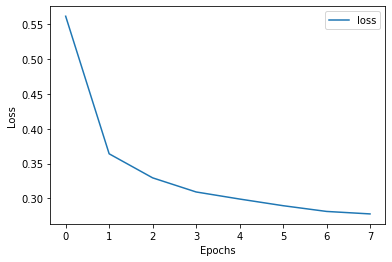

In [7]:
df = pd.DataFrame(history.history)
df.head()

loss_plot = df.plot(y='loss')
loss_plot.set(xlabel='Epochs', ylabel='Loss')

## Evaluate how the model performs with the test dataset

In [11]:
test_loss, test_accuracy, test_mae = model.evaluate(test_images[..., np.newaxis], test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3039 - sparse_categorical_accuracy: 0.8910 - mean_absolute_error: 4.4200


## Make predictions from the model

Actual: T-shirt/top


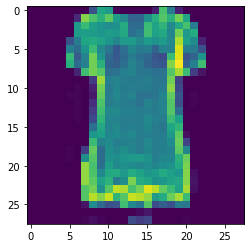

In [9]:
random_inx = np.random.choice(test_images.shape[0])
test_image = test_images[random_inx]
plt.imshow(test_image)
print(f"Actual: {labels[test_labels[random_inx]]}")

## View the predictions

In [10]:
predictions = model.predict(test_image[np.newaxis, ..., np.newaxis])
print(f"Prediction: {labels[np.argmax(predictions)]}")

Prediction: T-shirt/top
